In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(style="whitegrid")
# import missingno as msno # To visualize missing value
# import plotly.graph_objects as go # To Generate Graphs
# import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
# print the shape
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (918, 12)


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
df["Sex"] = df["Sex"].astype('category')
c = df.Sex.astype('category')
d = dict(enumerate(c.cat.categories))
print (d)
df["Sex"] = df["Sex"].cat.codes

df["ChestPainType"] = df["ChestPainType"].astype('category')
c = df.ChestPainType.astype('category')
d = dict(enumerate(c.cat.categories))
print (d)
df["ChestPainType"] = df["ChestPainType"].cat.codes

df["RestingECG"] = df["RestingECG"].astype('category')
c = df.RestingECG.astype('category')
d = dict(enumerate(c.cat.categories))
print (d)
df["RestingECG"] = df["RestingECG"].cat.codes

df["ExerciseAngina"] = df["ExerciseAngina"].astype('category')
c = df.ExerciseAngina.astype('category')
d = dict(enumerate(c.cat.categories))
print (d)
df["ExerciseAngina"] = df["ExerciseAngina"].cat.codes

df["ST_Slope"] = df["ST_Slope"].astype('category')
c = df.ST_Slope.astype('category')
d = dict(enumerate(c.cat.categories))
print (d)
df["ST_Slope"] = df["ST_Slope"].cat.codes

{0: 'F', 1: 'M'}
{0: 'ASY', 1: 'ATA', 2: 'NAP', 3: 'TA'}
{0: 'LVH', 1: 'Normal', 2: 'ST'}
{0: 'N', 1: 'Y'}
{0: 'Down', 1: 'Flat', 2: 'Up'}


In [ ]:
c = df.Sex.astype('category')

d = dict(enumerate(c.cat.categories))
print (d)

{0: 0, 1: 1}


In [ ]:
df.dtypes

Age                 int64
Sex                  int8
ChestPainType        int8
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG           int8
MaxHR               int64
ExerciseAngina       int8
Oldpeak           float64
ST_Slope             int8
HeartDisease        int64
dtype: object

In [ ]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df['HeartDisease'].nunique()

2

In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [ ]:
df['HeartDisease'].unique()

array([0, 1])

In [ ]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

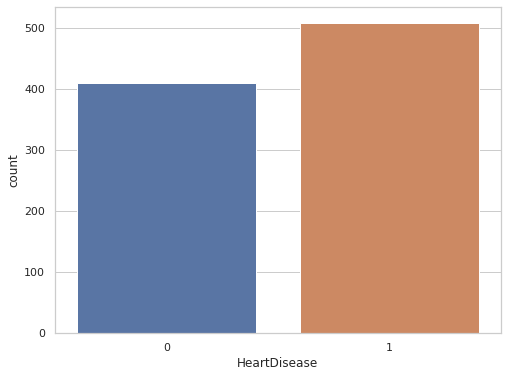

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="HeartDisease", data=df)
plt.show()

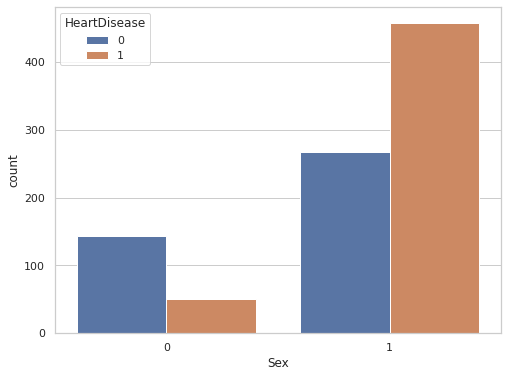

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="Sex", hue="HeartDisease", data=df)
plt.show()

In [ ]:
correlation = df.corr()

In [ ]:
correlation['HeartDisease'].sort_values(ascending=False)

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64

In [ ]:
df["ChestPainType"].value_counts()

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64

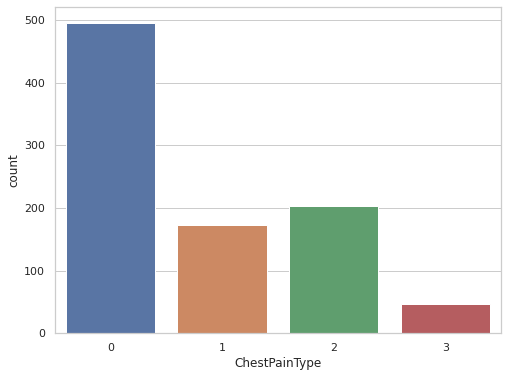

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="ChestPainType", data=df)
plt.show()

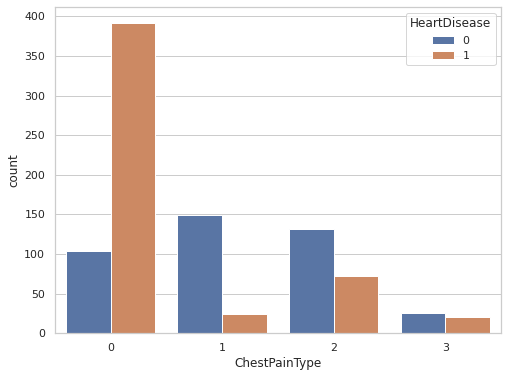

In [ ]:
# df.groupby('ChestPainType')['HeartDisease'].value_counts()
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="ChestPainType", hue="HeartDisease", data=df)
plt.show()

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


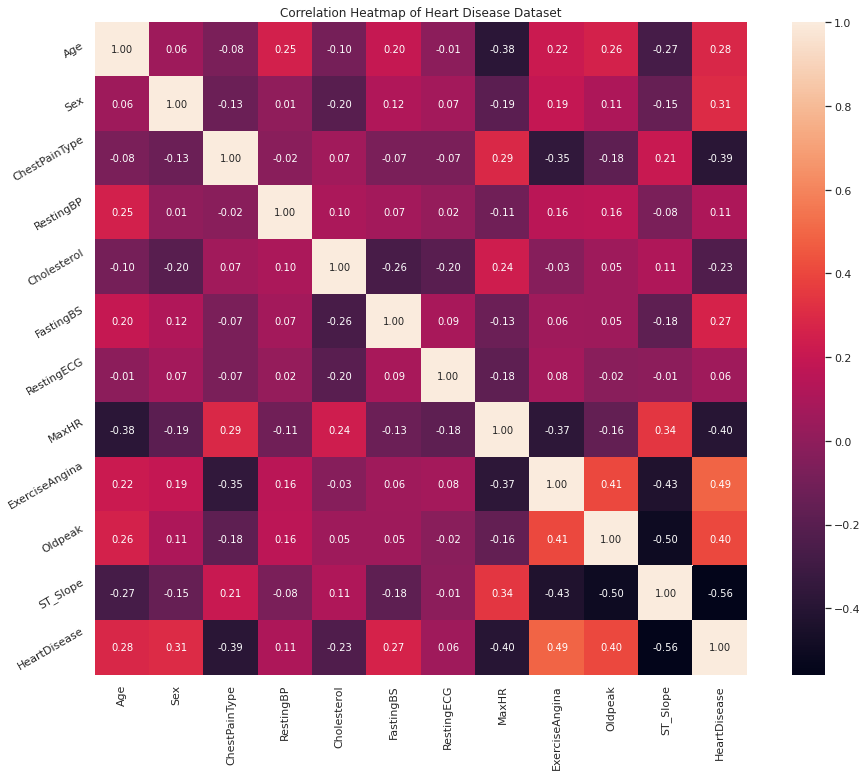

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

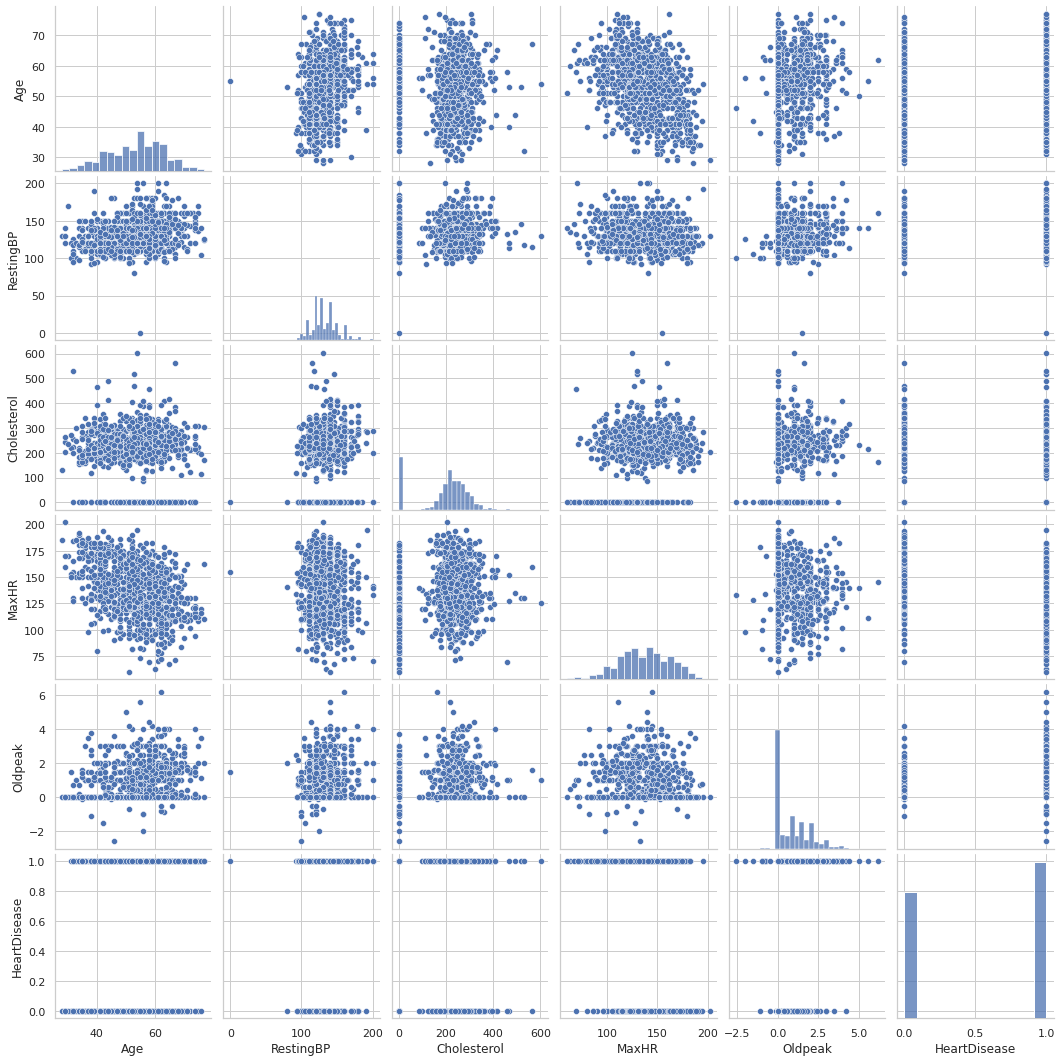

In [ ]:
num_var = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease' ]
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

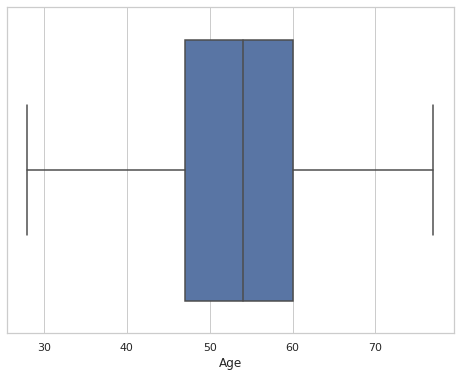

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["Age"])
plt.show()

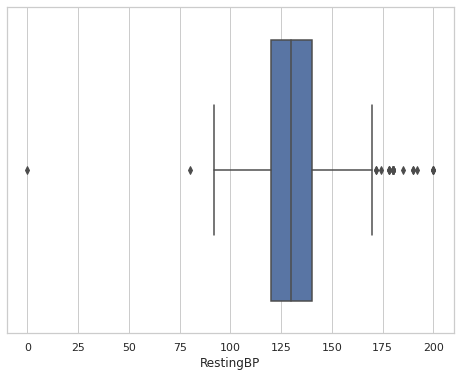

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["RestingBP"])
plt.show()

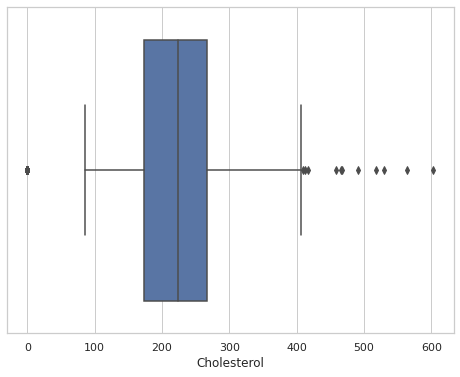

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["Cholesterol"])
plt.show()

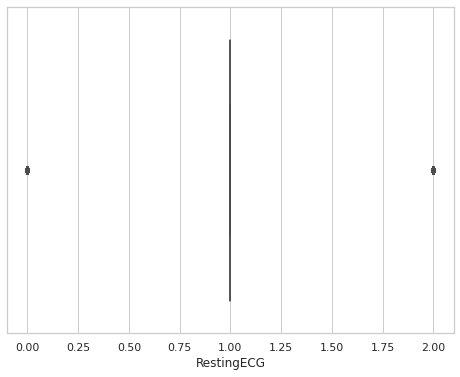

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["RestingECG"])
plt.show()

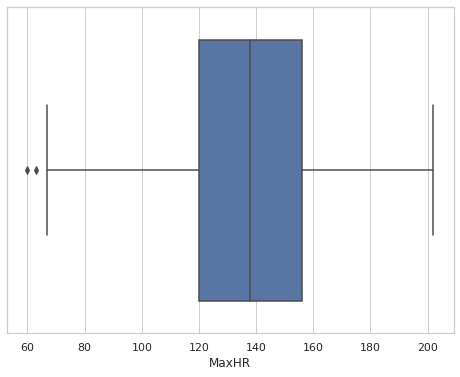

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["MaxHR"])
plt.show()

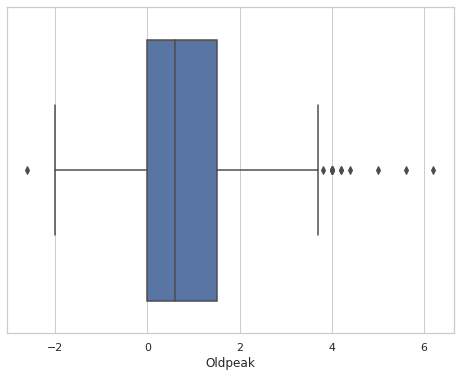

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["Oldpeak"])
plt.show()

In [ ]:
print(df)

     Age  Sex  ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0     40    1              1  ...      0.0         2             0
1     49    0              2  ...      1.0         1             1
2     37    1              1  ...      0.0         2             0
3     48    0              0  ...      1.5         1             1
4     54    1              2  ...      0.0         2             0
..   ...  ...            ...  ...      ...       ...           ...
913   45    1              3  ...      1.2         1             1
914   68    1              0  ...      3.4         1             1
915   57    1              0  ...      1.2         1             1
916   57    0              1  ...      0.0         1             1
917   38    1              2  ...      0.0         2             0

[918 rows x 12 columns]


In [ ]:
X = df.iloc[:, 0:11].values
y = df.iloc[:, 11].values

# **Training w/ Orginal Dataset (without Removing Outliers) but with Z-score Normalization, Tuning with 5 folds Cross Validation**

**Data Normalization using z-score formula**

In [ ]:
# Feature Scaling
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statistics import mean

# Normalize values using z-score formula z = (x - mean) / standard deviation
sc = StandardScaler()
normalized_X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, test_size=0.2, random_state=0)

In [ ]:
y_test

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
X_test

array([[ 0.15795389,  0.51595242, -0.81699495, ..., -0.8235563 ,
        -0.7386228 , -0.59607813],
       [ 1.32475593,  0.51595242, -0.81699495, ..., -0.8235563 ,
        -0.45719402, -0.59607813],
       [-0.26633776,  0.51595242, -0.81699495, ..., -0.8235563 ,
        -0.83243239, -0.59607813],
       ...,
       [-0.16026485,  0.51595242, -0.81699495, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-1.75135854,  0.51595242,  0.22903206, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [-0.05419193,  0.51595242,  1.27505906, ...,  1.21424608,
        -0.83243239, -0.59607813]])

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True)
lst_accu_stratified = []

for train_index, tune_index in skf.split(X_train, y_train):
    data_train_fold, data_tune_fold = X_train[train_index], X_train[tune_index]
    label_train_fold, label_tune_fold = y_train[train_index], y_train[tune_index]
    regressor.fit(data_train_fold, label_train_fold)
    lst_accu_stratified.append(regressor.score(data_tune_fold, label_tune_fold))
print("Default validation accuracy for Random Forest Classifier:", mean(lst_accu_stratified))

Default validation accuracy for Random Forest Classifier: 0.8759575062901873


In [ ]:
estimator_list = dict(n_estimators=range(1,50))
grid_regressor = GridSearchCV(RandomForestClassifier(), param_grid=estimator_list, cv=skf)
grid_regressor.fit(X_train, y_train)
print("The best parameters for Random Forest model are %s with a tuned validation accuracy score of %f" % (grid_regressor.best_params_, grid_regressor.best_score_))

The best parameters for Random Forest model are {'n_estimators': 31} with a tuned validation accuracy score of 0.876004


In [ ]:
y_pred = grid_regressor.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.15217391304347827
Mean Squared Error: 0.15217391304347827
Root Mean Squared Error: 0.39009474880274697


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Accuracy of the model using tuned hyperparameters
print(accuracy_score(y_test, y_pred))

[[61 16]
 [12 95]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        77
           1       0.86      0.89      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184

0.8478260869565217


In [ ]:
# Accuracy of the model using default hyperparameters
y_pred = regressor.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8532608695652174


**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

skf = StratifiedKFold(n_splits=5, shuffle=True)

# Run Suport vector machine with rbf kernel
svc_model = SVC(kernel='rbf')
lst_accu_stratified = []
for train_index, tune_index in skf.split(X_train, y_train):
    data_train_fold, data_tune_fold = X_train[train_index], X_train[tune_index]
    label_train_fold, label_tune_fold = y_train[train_index], y_train[tune_index]
    svc_model.fit(data_train_fold, label_train_fold)
    lst_accu_stratified.append(svc_model.score(data_tune_fold, label_tune_fold))
print("Default validation accuracy for SVM:", mean(lst_accu_stratified))

Default validation accuracy for SVM: 0.8719131488211723


In [ ]:
#Run SVM with give hyperparameters
C_range = []
gamma_range = []

for x in range(-5, 6):
    C_range.append(pow(10, x))
    gamma_range.append(pow(10, x))
    
param_grid = dict(gamma=gamma_range, C=C_range)
grid_svc = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=skf)
grid_svc.fit(X_train, y_train)
print("The best parameters for SVM model are %s with a tuned validation accuracy score of %f" % (grid_svc.best_params_, grid_svc.best_score_))

The best parameters for SVM model are {'C': 1, 'gamma': 0.1} with a tuned validation accuracy score of 0.875976


In [ ]:
from sklearn import metrics

y_pred = grid_svc.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1358695652173913
Mean Squared Error: 0.1358695652173913
Root Mean Squared Error: 0.3686048903872428


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Accuracy of the model using tuned hyperparameters
print(accuracy_score(y_test, y_pred))

[[62 15]
 [10 97]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        77
           1       0.87      0.91      0.89       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

0.8641304347826086


In [ ]:
#Accuracy of the model using default hyperparameters

y_pred = svc_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8695652173913043


**K nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Run Knn model with dedault parameters
knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True)

lst_accu_stratified = []
for train_index, tune_index in skf.split(X_train, y_train):
    data_train_fold, data_tune_fold = X_train[train_index], X_train[tune_index]
    label_train_fold, label_tune_fold = y_train[train_index], y_train[tune_index]
    knn.fit(data_train_fold, label_train_fold)
    lst_accu_stratified.append(knn.score(data_tune_fold, label_tune_fold))
print("Default validation accuracy for Knn:", mean(lst_accu_stratified))

Default validation accuracy for Knn: 0.856956481222626


In [ ]:
# Run knn model with given parameters
k_list = {'n_neighbors': range(1,50), 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=k_list, cv=skf)
grid_knn.fit(X_train, y_train)
print("The best parameters for Knn model are %s with a tuned validation accuracy score of %f" % (grid_knn.best_params_, grid_knn.best_score_))

The best parameters for Knn model are {'n_neighbors': 18, 'weights': 'distance'} with a tuned validation accuracy score of 0.866462


In [ ]:
y_pred = grid_knn.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.15217391304347827
Mean Squared Error: 0.15217391304347827
Root Mean Squared Error: 0.39009474880274697


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Accuracy of the model using tuned hyperparameters
print(accuracy_score(y_test, y_pred))

[[65 12]
 [16 91]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        77
           1       0.88      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184

0.8478260869565217


In [ ]:
#Accuracy of the model using default hyperparameters

y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8532608695652174


**MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

# Run MLP model with dedault parameters
skf = StratifiedKFold(n_splits=5, shuffle=True)

lst_accu_stratified = []
for train_index, tune_index in skf.split(X_train, y_train):
    data_train_fold, data_tune_fold = X_train[train_index], X_train[tune_index]
    label_train_fold, label_tune_fold = y_train[train_index], y_train[tune_index]
    mlp.fit(data_train_fold, label_train_fold)
    lst_accu_stratified.append(mlp.score(data_tune_fold, label_tune_fold))
print("Default validation accuracy for MLP:", mean(lst_accu_stratified))

Default validation accuracy for MLP: 0.8623800205013512


In [ ]:
parameter_space = {
    'max_iter': range(100, 500, 100),
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'activation': ['logistic', 'relu']
}

In [ ]:
grid_mlp = GridSearchCV(MLPClassifier(), param_grid=parameter_space, cv=skf)
grid_mlp.fit(X_train, y_train)
print("The best parameters for MLP model are %s with a tuned validation accuracy score of %f" % (grid_mlp.best_params_, grid_mlp.best_score_))

The best parameters for MLP model are {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'max_iter': 300} with a tuned validation accuracy score of 0.866508


In [ ]:
y_pred = grid_mlp.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16304347826086957
Mean Squared Error: 0.16304347826086957
Root Mean Squared Error: 0.4037864265436241


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Accuracy of the model using tuned hyperparameters
print(accuracy_score(y_test, y_pred))

[[58 19]
 [11 96]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        77
           1       0.83      0.90      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

0.8369565217391305


In [ ]:
#Accuracy of the model using default hyperparameters

y_pred = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8532608695652174


**Ada Boost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# svc=SVC(probability=True)        
ada = AdaBoostClassifier()
lst_accu_stratified = []

for train_index, tune_index in skf.split(X_train, y_train):
    data_train_fold, data_tune_fold = X_train[train_index], X_train[tune_index]
    label_train_fold, label_tune_fold = y_train[train_index], y_train[tune_index]
    ada.fit(data_train_fold, label_train_fold)
    lst_accu_stratified.append(ada.score(data_tune_fold, label_tune_fold))
print("Default validation accuracy for AdaBoost:", mean(lst_accu_stratified))

Default validation accuracy for AdaBoost: 0.8488118535085267


In [ ]:
parameter_space = {
    'n_estimators': range(1, 121, 20),
    'learning_rate': [0.05,0.1,0.2,0.3,0.5,0.7,1,1.2, 1.5, 1.7, 2.0, 2.5, 3.0]
}

In [ ]:
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid=parameter_space, cv=skf)
grid_ada.fit(X_train, y_train)
print("The best parameters for AdaBoost model are %s with a tuned validation accuracy score of %f" % (grid_ada.best_params_, grid_ada.best_score_))

The best parameters for AdaBoost model are {'learning_rate': 0.5, 'n_estimators': 41} with a tuned validation accuracy score of 0.871960


In [ ]:
y_pred = grid_ada.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16304347826086957
Mean Squared Error: 0.16304347826086957
Root Mean Squared Error: 0.4037864265436241


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Accuracy of the model using tuned hyperparameters
print(accuracy_score(y_test, y_pred))

[[59 18]
 [12 95]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        77
           1       0.84      0.89      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

0.8369565217391305


In [ ]:
#Accuracy of the model using default hyperparameters

y_pred = ada.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8315217391304348


# **Training w/ cleaner Dataset (removed outliers), Z-score Normalization, Tuning with 5 folds Cross Validation**

***Remove Outliers of each class from the Training dataset (we don't touch the test set here)***

In [ ]:
from scipy import stats

X_train_class_0 = []
X_train_class_1 = []

for i in range(len(y_train)):
  if y_train[i] == 0:
    X_train_class_0.append(X_train[i])
  else:
    X_train_class_1.append(X_train[i])

centroid_class_0 = [0]* len(X_train_class_0[0]) #intialize with 11 columns

for i in range(len(X_train_class_0)):
  for g in range(len(X_train_class_0[i])):
    centroid_class_0[g] += X_train_class_0[i][g]

centroid_class_0 = [number/len(X_train_class_0) for number in centroid_class_0]
                              
centroid_class_1 = [0]* len(X_train_class_1[0]) #intialize with 11 columns

for i in range(len(X_train_class_1)):
  for g in range(len(X_train_class_1[i])):
    centroid_class_1[g] += X_train_class_1[i][g]

centroid_class_1 = [number/len(X_train_class_1) for number in centroid_class_1]

centroid_class_0 = np.array(centroid_class_0)

class_0_distances = []
for data_point in X_train_class_0:
  distance = np.linalg.norm(centroid_class_0 - data_point) #calculate Euclidian distance between centroid of the class and the data point
  class_0_distances.append(distance)

centroid_class_1 = np.array(centroid_class_1)

class_1_distances = []
for data_point in X_train_class_1:
  distance = np.linalg.norm(centroid_class_1 - data_point) #calculate Euclidian distance between centroid of the class and the data point
  class_1_distances.append(distance)

z_class_0 = np.abs(stats.zscore(class_0_distances))
z_class_1 = np.abs(stats.zscore(class_1_distances))

cleaned_X_train_class_0 = []
cleaned_X_train_class_1 = []

for i in range(len(z_class_0)):
  if z_class_0[i] < 2: #only take 95% of data, or within 2 standard deviations
    cleaned_X_train_class_0.append(X_train_class_0[i])

for i in range(len(z_class_1)):
  if z_class_1[i] < 2: #only take 95% of data, or within 2 standard deviations
    cleaned_X_train_class_1.append(X_train_class_1[i])

y_train = [0]* len(cleaned_X_train_class_0) + [1]*len(cleaned_X_train_class_1)
X_train = cleaned_X_train_class_0 + cleaned_X_train_class_1

X_train = np.array(X_train)
y_train = np.array(y_train)

**Random Forest after removing Outliers**

In [ ]:
regressor = RandomForestClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True)
lst_accu_stratified = []

for train_index, tune_index in skf.split(X_train, y_train):
    data_train_fold, data_tune_fold = X_train[train_index], X_train[tune_index]
    label_train_fold, label_tune_fold = y_train[train_index], y_train[tune_index]
    regressor.fit(data_train_fold, label_train_fold)
    lst_accu_stratified.append(regressor.score(data_tune_fold, label_tune_fold))
print("Default validation accuracy for Random Forest Classifier:", mean(lst_accu_stratified))

Default validation accuracy for Random Forest Classifier: 0.8760563380281691


In [ ]:
estimator_list = dict(n_estimators=range(1,50))
grid_regressor = GridSearchCV(RandomForestClassifier(), param_grid=estimator_list, cv=skf)
grid_regressor.fit(X_train, y_train)
print("The best parameters for Random Forest model are %s with a tuned validation accuracy score of %f" % (grid_regressor.best_params_, grid_regressor.best_score_))

The best parameters for Random Forest model are {'n_estimators': 34} with a tuned validation accuracy score of 0.891549


In [ ]:
y_pred = grid_regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.15760869565217392
Mean Squared Error: 0.15760869565217392
Root Mean Squared Error: 0.39699961669021033


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Accuracy of the model using tuned hyperparameters
print(accuracy_score(y_test, y_pred))

[[60 17]
 [12 95]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        77
           1       0.85      0.89      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184

0.842391304347826


In [ ]:
# Accuracy of the model using default hyperparameters
y_pred = regressor.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8532608695652174


**Support Vector Machine after removing Outliers**

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Run Suport vector machine with rbf kernel
svc_model = SVC(kernel='rbf')
lst_accu_stratified = []
for train_index, tune_index in skf.split(X_train, y_train):
    data_train_fold, data_tune_fold = X_train[train_index], X_train[tune_index]
    label_train_fold, label_tune_fold = y_train[train_index], y_train[tune_index]
    svc_model.fit(data_train_fold, label_train_fold)
    lst_accu_stratified.append(svc_model.score(data_tune_fold, label_tune_fold))
print("Default validation accuracy for SVM:", mean(lst_accu_stratified))

Default validation accuracy for SVM: 0.8788732394366198


In [ ]:
#Run SVM with give hyperparameters
C_range = []
gamma_range = []

for x in range(-5, 6):
    C_range.append(pow(10, x))
    gamma_range.append(pow(10, x))
    
param_grid = dict(gamma=gamma_range, C=C_range)
grid_svc = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=skf)
grid_svc.fit(X_train, y_train)
print("The best parameters for SVM model are %s with a tuned validation accuracy score of %f" % (grid_svc.best_params_, grid_svc.best_score_))

The best parameters for SVM model are {'C': 1, 'gamma': 0.1} with a tuned validation accuracy score of 0.888732


In [ ]:
from sklearn import metrics

y_pred = grid_svc.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1358695652173913
Mean Squared Error: 0.1358695652173913
Root Mean Squared Error: 0.3686048903872428


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Accuracy of the model using tuned hyperparameters
print(accuracy_score(y_test, y_pred))

[[62 15]
 [10 97]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        77
           1       0.87      0.91      0.89       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

0.8641304347826086


In [ ]:
#Accuracy of the model using default hyperparameters

y_pred = svc_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8532608695652174


**Knn after removing Outliers**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Run Knn model with dedault parameters
knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True)

lst_accu_stratified = []
for train_index, tune_index in skf.split(X_train, y_train):
    data_train_fold, data_tune_fold = X_train[train_index], X_train[tune_index]
    label_train_fold, label_tune_fold = y_train[train_index], y_train[tune_index]
    knn.fit(data_train_fold, label_train_fold)
    lst_accu_stratified.append(knn.score(data_tune_fold, label_tune_fold))
print("Default validation accuracy for Knn:", mean(lst_accu_stratified))

Default validation accuracy for Knn: 0.8661971830985915


In [ ]:
# Run knn model with given parameters
k_list = {'n_neighbors': range(1,50), 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid=k_list, cv=skf)
grid_knn.fit(X_train, y_train)
print("The best parameters for Knn model are %s with a tuned validation accuracy score of %f" % (grid_knn.best_params_, grid_knn.best_score_))

The best parameters for Knn model are {'n_neighbors': 25, 'weights': 'distance'} with a tuned validation accuracy score of 0.885915


In [ ]:
y_pred = grid_knn.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16847826086956522
Mean Squared Error: 0.16847826086956522
Root Mean Squared Error: 0.4104610345325914


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Accuracy of the model using tuned hyperparameters
print(accuracy_score(y_test, y_pred))

[[64 13]
 [18 89]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        77
           1       0.87      0.83      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

0.8315217391304348


In [ ]:
#Accuracy of the model using default hyperparameters

y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8586956521739131


**MLP after removing outliers**

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

# Run MLP model with dedault parameters
skf = StratifiedKFold(n_splits=5, shuffle=True)

lst_accu_stratified = []
for train_index, tune_index in skf.split(X_train, y_train):
    data_train_fold, data_tune_fold = X_train[train_index], X_train[tune_index]
    label_train_fold, label_tune_fold = y_train[train_index], y_train[tune_index]
    mlp.fit(data_train_fold, label_train_fold)
    lst_accu_stratified.append(mlp.score(data_tune_fold, label_tune_fold))
print("Default validation accuracy for MLP:", mean(lst_accu_stratified))

Default validation accuracy for MLP: 0.8816901408450704


In [ ]:
parameter_space = {
    'max_iter': range(100, 500, 100),
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'activation': ['logistic', 'relu']
}

In [ ]:
grid_mlp = GridSearchCV(MLPClassifier(), param_grid=parameter_space, cv=skf)
grid_mlp.fit(X_train, y_train)
print("The best parameters for MLP model are %s with a tuned validation accuracy score of %f" % (grid_mlp.best_params_, grid_mlp.best_score_))

The best parameters for MLP model are {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200} with a tuned validation accuracy score of 0.877465


In [ ]:
y_pred = grid_mlp.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11413043478260869
Mean Squared Error: 0.11413043478260869
Root Mean Squared Error: 0.3378319623460881


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Accuracy of the model using tuned hyperparameters
print(accuracy_score(y_test, y_pred))

[[66 11]
 [10 97]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.86        77
           1       0.90      0.91      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184

0.8858695652173914


In [ ]:
#Accuracy of the model using default hyperparameters

y_pred = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8641304347826086


**AdaBoost after removing Outliers**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
        
ada = AdaBoostClassifier()
lst_accu_stratified = []

for train_index, tune_index in skf.split(X_train, y_train):
    data_train_fold, data_tune_fold = X_train[train_index], X_train[tune_index]
    label_train_fold, label_tune_fold = y_train[train_index], y_train[tune_index]
    ada.fit(data_train_fold, label_train_fold)
    lst_accu_stratified.append(ada.score(data_tune_fold, label_tune_fold))
print("Default validation accuracy for Ada Boost:", mean(lst_accu_stratified))

Default validation accuracy for MLP: 0.8732394366197183


In [ ]:
parameter_space = {
    'n_estimators': range(1, 121, 20),
    'learning_rate': [0.05,0.1,0.2,0.3,0.5,0.7,1,1.2, 1.5, 1.7, 2.0, 2.5, 3.0]
}

In [ ]:
grid_ada = GridSearchCV(AdaBoostClassifier(), param_grid=parameter_space, cv=skf)
grid_ada.fit(X_train, y_train)
print("The best parameters for MLP model are %s with a tuned validation accuracy score of %f" % (grid_ada.best_params_, grid_ada.best_score_))

The best parameters for MLP model are {'learning_rate': 0.3, 'n_estimators': 21} with a tuned validation accuracy score of 0.885915


In [ ]:
y_pred = grid_ada.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.15760869565217392
Mean Squared Error: 0.15760869565217392
Root Mean Squared Error: 0.39699961669021033


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Accuracy of the model using tuned hyperparameters
print(accuracy_score(y_test, y_pred))

[[60 17]
 [12 95]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.81        77
           1       0.85      0.89      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184

0.842391304347826


In [ ]:
#Accuracy of the model using default hyperparameters

y_pred = mlp.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8641304347826086
